In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

In [4]:
path_crime= pd.read_csv('RMS.csv')
path_crime.head()

FileNotFoundError: [Errno 2] File RMS.csv does not exist: 'RMS.csv'

In [4]:
#pd.DataFrame({'Month':[path_crime.SN.nunique()]})

In [5]:
#path_crime=['MONTH'].nunique()

In [6]:
Num_months=path_crime.loc[:,"MONTH"]
#print(Num_months)
Num_months.value_counts()

Type_desc= path_crime.loc[:,"OFFENSE-DESC"]
Type_desc.value_counts()



group_month = path_crime.groupby(["MONTH"]).count()["OFFENSE-DESC"]
group_month

#print(group_month)

MONTH
APRIL        18770
AUGUST       18761
DECEMBER     17189
FEBRUARY     16505
JANUARY      17578
JULY         19429
JUNE         18804
MARCH        18854
MAY          19573
NOVEMBER     16938
OCTOBER      18065
SEPTEMBER    18757
Name: OFFENSE-DESC, dtype: int64

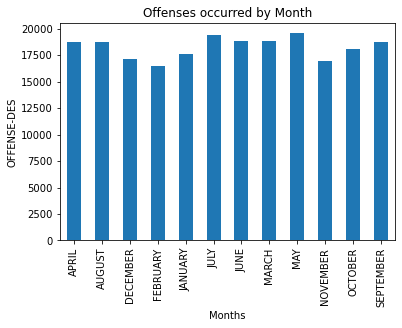

<Figure size 432x288 with 0 Axes>

In [7]:

grouped_dm = path_crime.groupby(["MONTH"]).count()["OFFENSE-DESC"]
grouped_dm

crime_chart= grouped_dm.plot(kind="bar", title= "")
crime_chart.set_xlabel("Months")
crime_chart.set_ylabel("OFFENSE-DES")
plt.title('Offenses occurred by Month')
plt.show()
plt.tight_layout()

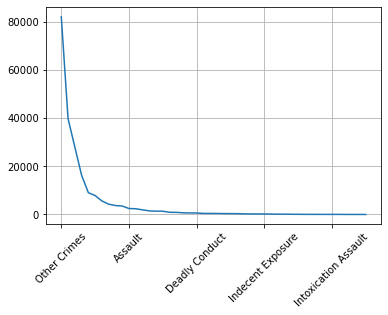

In [11]:
Type_desc.value_counts().plot(rot=45,grid=True)

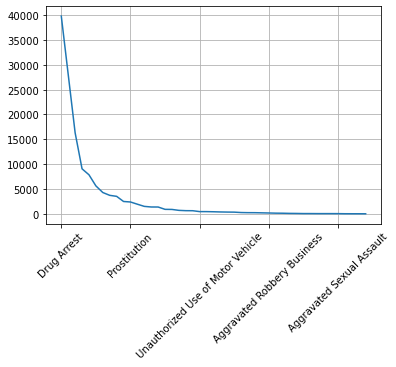

In [15]:
Type_desc.value_counts().drop('Other Crimes').plot(rot=45,grid=True)

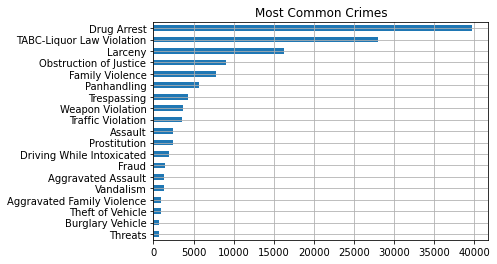

In [30]:
df = Type_desc.value_counts()[1:20].sort_values(ascending=True)
df.plot(kind='barh',grid=True)
plt.title('Most Common Crimes')
plt.show()

In [33]:
path_crime.head(1)

,ARREST_DATE,DATE,YEAR,MONTH,WEEK,SEX,RACE,ETHNIC,FBI,SID,...,INVOLVEMENT,INCIDENT_NUM,OFFENSE_CODE,OFFENSE-DESC,RMS_DESCRIPTION,GIS_ARCTYPE,DISTRICT,CITY,STATE,ZIP
OFFENSE-DESC,,,,,,,,,,,,,,,,,,,,,
0,1/1/2016,1/1/2016,2016,JANUARY,1,F,W,N,NaN,NaN,...,A,SAPD16000022,420001,TABC-Liquor Law Violation,PUBLIC INTOXICATION,OTHER,NaN,SAN ANTONIO (BE),TX,78205


In [52]:
path_crime.columns

Index(['ARREST_DATE', 'DATE', 'YEAR', 'MONTH', 'WEEK', 'SEX', 'RACE', 'ETHNIC',
       'FBI', 'SID', 'DOB', 'AGE', 'INVOLVEMENT', 'INCIDENT_NUM',
       'OFFENSE_CODE', 'OFFENSE-DESC', 'RMS_DESCRIPTION', 'GIS_ARCTYPE',
       'DISTRICT', 'CITY', 'STATE', 'ZIP'],
      dtype='object')

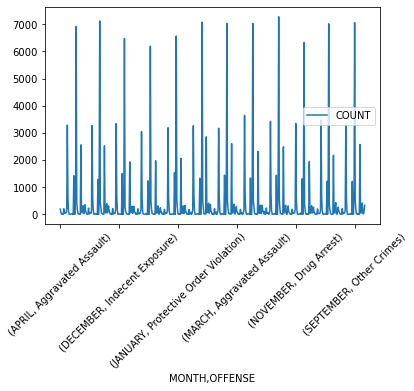

In [60]:
df2 = path_crime[['MONTH','OFFENSE-DESC','AGE']].rename(columns={'OFFENSE-DESC':'OFFENSE', 'AGE':'COUNT'})
df2.groupby(['MONTH','OFFENSE']).count().plot(rot=45)

In [73]:
#colors = ['green', 'blue']
#explode = (0.1, 0)
#plot =crime_df.plot.pie(y='OFFENSE-DESC',figsize=(5,5), colors = colors, startangle=140, explode = explode, shadow = True, autopct="%1.1f%%")

#plt.title("Male vs Female Mouse Population",fontsize = 20)
#plt.ylabel("Sex",fontsize = 14)
##plt.axis("equal",fontsize = 14)

#plt.show()

In [72]:
#offense_df = crime_df.loc[crime_df["OFFENSE-DESC"] == "Vandalism",:]
#offense_df.head()




,OFFENSE-DESC
OFFENSE-DESC,
20,Vandalism
29,Vandalism
169,Vandalism
201,Vandalism
304,Vandalism


In [69]:
#offense_df = crime_df.loc[crime_df["OFFENSE-DESC"] == "TABC-Liquor Law Violation",:]
#offense_df.head()

,OFFENSE-DESC
OFFENSE-DESC,
0,TABC-Liquor Law Violation
1,TABC-Liquor Law Violation
8,TABC-Liquor Law Violation
9,TABC-Liquor Law Violation
12,TABC-Liquor Law Violation
